# Title of Assignment-2

### Implementing FeedForward neural networks with Keras and Tensorflow
1. Import the necessary packages
2. Load the training and testing data (MNIST)
3. Define the network architecture using Kears
4. Train the model using SGD
5. Evaluate th enetwork
6. Plot the training loss and accuracy

# Importing libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
get_ipython().run_line_magic("matplotlib","inline")  #Inline graph import karta hai


In [4]:
mnist = tf.keras.datasets.mnist  #mnist is an institute
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
len(x_train) # 60000 images training

60000

In [6]:
len(x_test)  # 10000 testing dataset

10000

In [7]:
x_train.shape  # 10000 trained images
x_test.shape  # test images given in matrix 28 x 28 

(10000, 28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

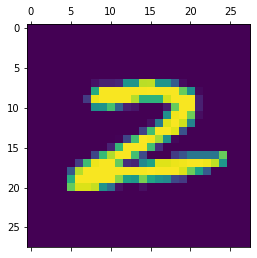

In [9]:
plt.matshow(x_train[199])        # shows 13th index image

In [10]:
x_train = x_train/255    # normalizing
x_test = x_test/255

In [11]:
x_train[11] # reshape hota values 0 to 1 madhye yeta because we divided it with 255 above

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6505 - accuracy: 0.8345 - val_loss: 0.3602 - val_accuracy: 0.9015
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3402 - accuracy: 0.9054 - val_loss: 0.2964 - val_accuracy: 0.9178
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2914 - accuracy: 0.9185 - val_loss: 0.2641 - val_accuracy: 0.9234
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2613 - accuracy: 0.9259 - val_loss: 0.2406 - val_accuracy: 0.9305
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2387 - accuracy: 0.9329 - val_loss: 0.2255 - val_accuracy: 0.9350
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2204 - accuracy: 0.9382 - val_loss: 0.2090 - val_accuracy: 0.9403
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2046 - accuracy: 0.9425 - val_loss: 0.1939 - val_accuracy:

In [15]:
test_loss, test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1678 - accuracy: 0.9522
Loss=0.168
Accuracy=0.952


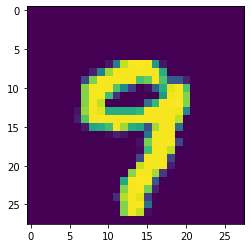

In [16]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [17]:
predicted_value=model.predict(x_test)
print("Handwritten nuber in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 0s 1ms/step
Handwritten nuber in the image is= 9


In [19]:
#get_ipython().run_line_magic('pinfo2','history.history')
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

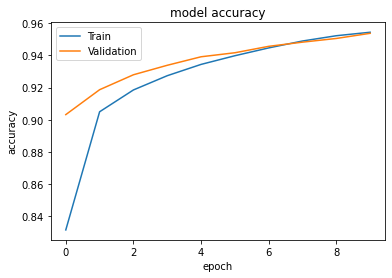

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

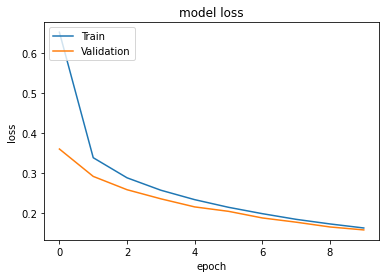

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

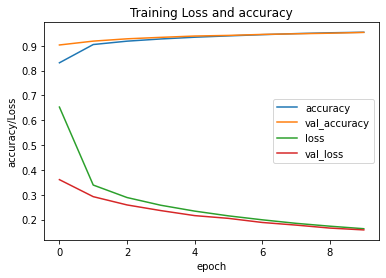

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()

In [24]:
keras_model_path="C:\\Users\\Soumya"
model.save(keras_model_path)

INFO:tensorflow:Assets written to: C:\Users\Soumya\assets


In [25]:
restored_keras_model = tf.keras.models.load_model(keras_model_path)